In [1]:
# from dpm.utils import cov
import torch
from dpm.distributions import MixtureModel
from dpm.distributions import Normal, Categorical, GumbelSoftmax, Data
from dpm.visualize import plot_model, plot_models, plot_stats
from pprint import pprint

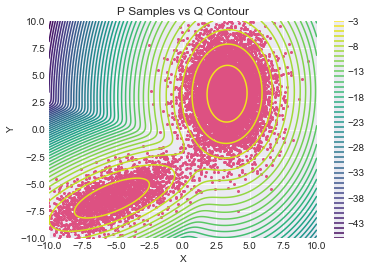

In [2]:
model = MixtureModel([Normal([3.3, 3.3], [2.3, 0.1, 0.1, 7.]), 
                      Normal([-5.3, -6.3], [7, 4.2, 3.1, 3])], [0.75, 0.25])

X = model.sample(10000).detach()
plot_model(model)

tensor([0.5000, 0.5000], grad_fn=<SoftmaxBackward>)
Parameter containing:
tensor([-0.7057,  1.6966], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)
Parameter containing:
tensor([-0.1334, -0.8440], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)


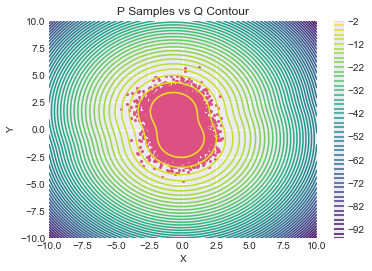

In [4]:
from dpm.models import GaussianMixtureModel


m = GaussianMixtureModel(n_dims=2)

plot_model(m)
print(m.model.categorical.probs)
print(m.model.models[0].loc, m.model.models[0].scale)
print(m.model.models[1].loc, m.model.models[1].scale)

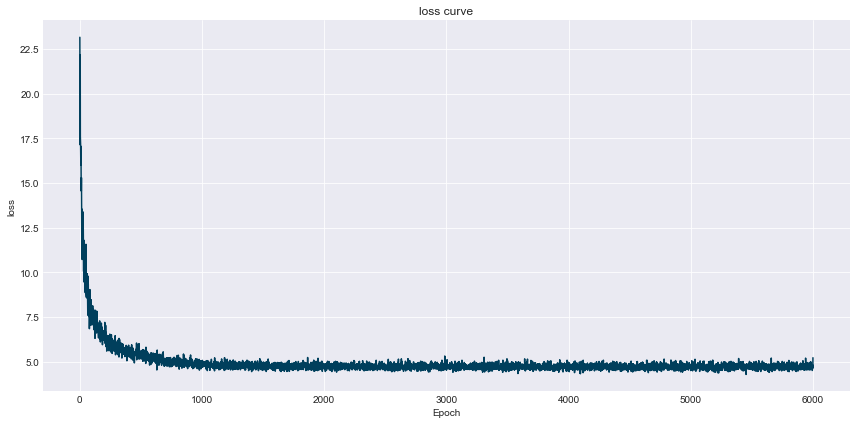

In [5]:
stats = m.fit(X, epochs=6000, track_parameters=False)
plot_stats(stats)

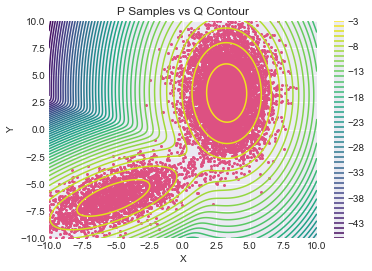

In [6]:
plot_model(m)

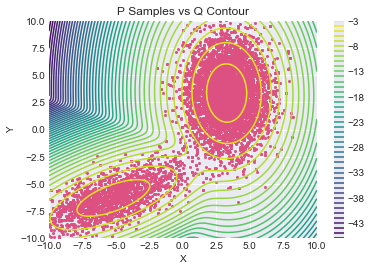

In [7]:
plot_models(Data(X), m)

In [8]:
m.model.categorical.probs

tensor([0.7586, 0.2414], grad_fn=<SoftmaxBackward>)

In [9]:
m.model.models[0].loc, m.model.models[0].scale

(Parameter containing:
 tensor([3.2696, 3.3616], requires_grad=True), tensor([[ 2.2267, -0.0674],
         [-0.0674,  7.1442]], grad_fn=<MmBackward>))

In [10]:
m.model.models[1].loc, m.model.models[1].scale

(Parameter containing:
 tensor([-5.1901, -6.2873], requires_grad=True), tensor([[7.4757, 3.0536],
         [3.0536, 2.8691]], grad_fn=<MmBackward>))

In [11]:
preds = m.predict(X).numpy()

In [12]:
import numpy as np

one = X[np.where(preds == 1)]
zeros = X[np.where(preds == 0)]

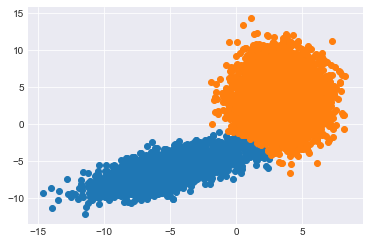

In [13]:
import matplotlib.pyplot as plt

plt.scatter(one[:,0], one[:, 1])
plt.scatter(zeros[:,0], zeros[:,1])

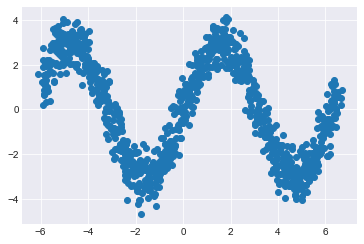

In [14]:
# Parameters
n_samples = 1000

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4. * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3. * (np.sin(x) + np.random.normal(0, .2))

plt.scatter(X[:, 0], X[:, 1])
plt.show()

tensor([0.2500, 0.2500, 0.2500, 0.2500], grad_fn=<SoftmaxBackward>)
Parameter containing:
tensor([-0.7371, -0.1647], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)
Parameter containing:
tensor([-0.0552, -0.5974], requires_grad=True) tensor([[1., 0.],
        [0., 1.]], grad_fn=<MmBackward>)


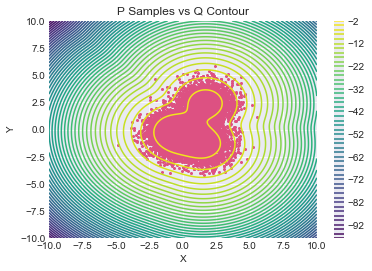

In [20]:
m = GaussianMixtureModel(n_components=4, n_dims=2)

plot_model(m)
print(m.model.categorical.probs)
print(m.model.models[0].loc, m.model.models[0].scale)
print(m.model.models[1].loc, m.model.models[1].scale)

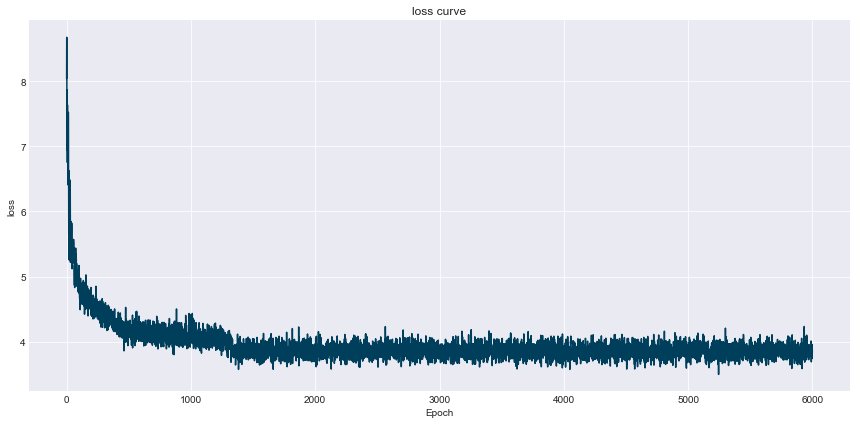

In [21]:
stats = m.fit(X, epochs=6000, track_parameters=False)
plot_stats(stats)
plt.show()

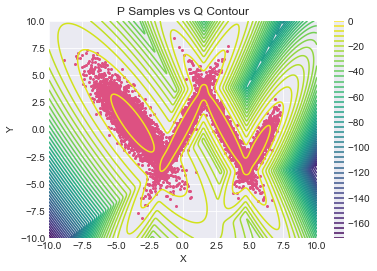

In [22]:
plot_model(m)

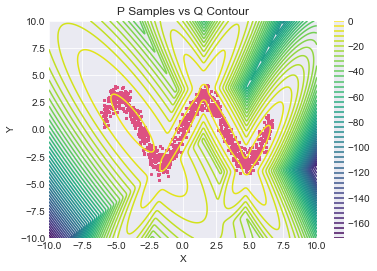

In [23]:
plot_models(Data(X), m)

In [24]:
preds = m.predict(torch.tensor(X).float()).numpy()
collections = [X[np.where(preds == i)] for i in range(m.n_components)]

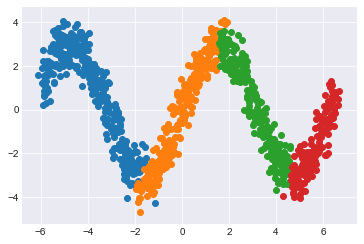

In [25]:
for i in range(m.n_components):
    plt.scatter(collections[i][:,0], collections[i][:, 1])